## *Análise exploratória* ##

*__Para entender a estrutura, padrões, distribuições e características principais dos dados antes de realizar análises mais aprofundadas__*

__Case__

- André Tech e sua equipe fazem análises manuais para o banco, que tem riscos de erros e falhas de processo.

-> BI centraliza e automatiza os processos com confiabilidade e visibilidade.

- Camila Diniz, quer investir mais em marketing e melhorar a segmentação dos clientes nas cidades que o banco já está estabelecido.

-> BI da visibilidade para saber em quais segmentos mais vale investir em marketing.

- Lucas Johnson, propõe comparar popularidade agencias digitais e físicas. Também explorar como PIX afetou as transações, identificar padrões de inatividade.

-> Medir transações em agencias fisicas e digitais x tempo. Também medir pix x serviços similares como transferência, TED, DOC, boleto, débito, crédito



`1.-Como podemos convencer Camila Diniz, diretora comercial, que as nossas soluções serão úteis para a empresa?`

-> Mostrando que BI potencializa os resultados do marketing.

-Faremos uma análise exploratória para entender quais perguntas de negócio podemos responder para mostrar o valor que dados possuem para a empresa?

-> 1) Como minimizar os riscos de fazer análises manuais?
   2) Como otimizar o direcionamento do investimento em marketing?
   3) Como determinar as tendências no uso de agencias físicas em comparação com agencias digitais?
   4) Como identificar padrões no uso de serviços como Pix em comparação com serviços similares?


`2.-Quais serão os indicadores ou visualizações utilizadas para responder às perguntas de negócio citadas anteriormente?`

  -Um dashboard dos principais KPIs de negócio do BanVic permitindo um detalhamento por data, por agência e por clientes.
  
-> 1) KPI: Tempo médio e quantidade de falhas encontradas em análises (comparar feitas manualmente pelo André x feitas por especialista análise de dados)

   2) Visualização: Segmentos de clientes que trazem e tem o potencial de trazer maior renda para o banco para investimento de marketing nesses segmentos

   3) KPI: Taxa de transações diárias por tipo de agencia (fisica x digital)
   
   4) KPI: Taxa de transferências diárias por serviço (pix, transferência bancária, TED, DOC, boleto, débito, crédito)

`3.-Apresentar pelo menos duas análises de negócio para cada categoria:`

->

1. Análise Descritiva
2. Análise diagnóstica;
3. Análise prescritiva;
4. Análise preditiva.


In [5]:
#importando pandas para visualizacão de dataframes
import pandas as pd
#importando matplotlib.pyplot para visualizações preliminares
import matplotlib.pyplot as plt


Importar os datasets e visualizando suas primeiras linhas

In [65]:
df = pd.read_csv("clientes.csv")
print(df.columns)
df.head(5)

Index(['cod_cliente', 'primeiro_nome', 'ultimo_nome', 'email', 'tipo_cliente',
       'data_inclusao', 'cpfcnpj', 'data_nascimento', 'endereco', 'cep'],
      dtype='object')


,cod_cliente,primeiro_nome,ultimo_nome,email,tipo_cliente,data_inclusao,cpfcnpj,data_nascimento,endereco,cep
0,28,Sabrina,Dias,moreiraemanuelly@example.org,PF,2017-04-03 16:11:00 UTC,357.081.496-39,2006-08-11,Praia de Duarte Vila Piratininga 81327-166 Fer...,95140-704
1,674,Luiz Felipe,Dias,pedroferreira@example.org,PF,2021-02-10 13:27:00 UTC,085.196.374-93,1995-10-11,"Avenida da Rosa, 654 João Paulo Ii 20295449 Nu...",76516-765
2,693,Renan,Dias,ogomes@example.net,PF,2020-01-21 13:12:00 UTC,783.416.059-10,1948-11-19,Jardim de Rodrigues Ipiranga 14161-477 Duarte ...,51779625
3,743,Clara,Dias,rafaelcorreia@example.org,PF,2019-05-06 11:39:00 UTC,589.237.610-95,1978-01-27,"Colônia Thomas Silva, 9 Tupi B 15771-946 Ferna...",19615792
4,769,André,Dias,danilo33@example.org,PF,2017-01-07 14:53:00 UTC,459.608.721-02,1990-08-25,"Rua Correia, 889 Diamante 59123250 Aragão / RS",01672838


In [67]:
meio = len(df['endereco']) // 2
display(df['endereco'].iloc[meio-5:meio+5])

display(df['endereco'].tail(20))

494    Passarela Luiz Otávio Nascimento Conjunto Jard...
495    Feira Aragão, 41 Marmiteiros 56012309 Araújo / AM
496    Morro Pedro Miguel Pinto, 9 São Luiz 98347-897...
497    Recanto Gustavo Henrique Dias, 64 Vila Da Paz ...
498    Vila Maria Fernanda Barbosa, 10 Virgínia 52639...
499    Sítio de da Mota Engenho Nogueira 86201-053 Co...
500     Vila Sales, 56 São Lucas 72371269 das Neves / PA
501    Núcleo Peixoto, 29 Beija Flor 12707682 Cunha / RR
502    Distrito Clarice da Luz, 35 Lourdes 24553496 L...
503    Trecho Yago Dias, 20 Jardim América 07951411 d...
Name: endereco, dtype: object

978    Praça Barros, 4 Unidas 18759785 Cardoso de Goi...
979    Largo Novaes, 62 Alípio De Melo 10978-312 Cast...
980    Trecho Gomes, 615 Concórdia 78034-295 Nascimen...
981    Núcleo de Barbosa, 483 Santo André 73918-122 A...
982    Viaduto de Barbosa, 97 Nova America 88034834 S...
983    Vereda da Luz, 34 Cachoeirinha 24441510 Campos...
984    Estação Moura, 903 Olhos D'água 09013-005 Barr...
985    Alameda de Ferreira, 35 Vila Nova Gameleira 1ª...
986    Vila Cavalcanti, 8 Milionario 04460296 Cardoso...
987    Viaduto Bruno Dias, 68 Mariquinhas 02965-100 R...
988    Lagoa Lucca da Luz, 81 Laranjeiras 49327056 Fa...
989    Sítio Teixeira, 17 Vila Engenho Nogueira 44233...
990    Conjunto Sales, 85 Santo Agostinho 25555778 Al...
991    Ladeira de Ferreira Nova Pampulha 71101341 Aze...
992    Viela Araújo, 98 Xodo-Marize 64207859 Teixeira...
993    Chácara de Martins, 85 Mantiqueira 26805-573 A...
994      Pátio de Souza, 8 Vila Puc 47056676 Duarte / MS
995    Loteamento Pires, 4 Jard

In [7]:

#obter o número de linhas
num_linhas = len(df)

print(f'O DataFrame "clientes" possui {num_linhas} linhas.')


O DataFrame "clientes" possui 998 linhas.


In [8]:
df = pd.read_csv("agencias.csv")
print(df.columns)
df.head(3)

Index(['cod_agencia', 'nome', 'endereco', 'cidade', 'uf', 'data_abertura',
       'tipo_agencia'],
      dtype='object')


,cod_agencia,nome,endereco,cidade,uf,data_abertura,tipo_agencia
0,7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital
1,1,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física
2,2,Agência Tatuapé,"Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...",São Paulo,SP,2010-06-14,Física


In [9]:
df = pd.read_csv("colaborador_agencia.csv")
print(df.columns)
df.head(3)

Index(['cod_colaborador', 'cod_agencia'], dtype='object')


,cod_colaborador,cod_agencia
0,7,1
1,13,1
2,14,1


In [10]:
df = pd.read_csv("colaboradores.csv")
print(df.columns)
df.head(3)

Index(['cod_colaborador', 'primeiro_nome', 'ultimo_nome', 'email', 'cpf',
       'data_nascimento', 'endereco', 'cep'],
      dtype='object')


,cod_colaborador,primeiro_nome,ultimo_nome,email,cpf,data_nascimento,endereco,cep
0,14,Paulo,Dias,melissalopes@example.net,847.210.695-02,1974-04-24,"Lagoa de Rodrigues, 62 Zilah Sposito 37328-273...",27275674
1,19,Luiz Fernando,Dias,pcunha@example.net,820.415.963-33,1994-07-10,"Ladeira de Moreira, 82 Jardim Atlântico 27617-...",50013962
2,32,Vitor Hugo,Dias,aragaonicolas@example.net,936.172.548-37,1986-12-18,Área Sophie Moreira Maria Virgínia 71941-111 S...,08955-215


In [11]:
df = pd.read_csv("contas.csv")
print(df.columns)
df.head(3)

Index(['num_conta', 'cod_cliente', 'cod_agencia', 'cod_colaborador',
       'tipo_conta', 'data_abertura', 'saldo_total', 'saldo_disponivel',
       'data_ultimo_lancamento'],
      dtype='object')


,num_conta,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,data_abertura,saldo_total,saldo_disponivel,data_ultimo_lancamento
0,53,53,1,7,PF,2011-05-24 15:30:00 UTC,2984.7615,2814.67,2019-07-02 11:03:46 UTC
1,190,190,1,7,PF,2014-10-17 14:48:00 UTC,4262.4322,4191.86,2021-03-25 12:00:15 UTC
2,191,191,1,7,PF,2013-03-23 14:14:00 UTC,3266.5680,3080.71,2016-09-09 23:34:15 UTC


In [12]:
df = pd.read_csv("propostas_credito.csv")
print(df.columns)
df.head(3)

Index(['cod_proposta', 'cod_cliente', 'cod_colaborador',
       'data_entrada_proposta', 'taxa_juros_mensal', 'valor_proposta',
       'valor_financiamento', 'valor_entrada', 'valor_prestacao',
       'quantidade_parcelas', 'carencia', 'status_proposta'],
      dtype='object')


,cod_proposta,cod_cliente,cod_colaborador,data_entrada_proposta,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,status_proposta
0,116,338,1,2014-05-30 18:43:12 UTC,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,0,Enviada
1,715,45,1,2021-06-17 13:09:32 UTC,0.0131,12897.538285,19848.55,6951.011715,232.124685,100,1,Enviada
2,755,494,1,2021-08-10 04:24:02 UTC,0.0203,122236.312551,187154.36,64918.047449,3673.518951,56,0,Enviada


In [13]:
df = pd.read_csv("transacoes.csv")
print(df.columns)
df.head(3)

Index(['cod_transacao', 'num_conta', 'data_transacao', 'nome_transacao',
       'valor_transacao'],
      dtype='object')


,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
0,3100,256,2020-05-22 03:15:21 UTC,Saque,-130.0
1,28405,256,2021-06-29 11:52:38 UTC,Saque,-255.0
2,1776,512,2020-05-17 13:04:50 UTC,Saque,-250.0


Observar os valores das colunas que podem nos interessar

In [14]:
clientes = pd.read_csv("clientes.csv")
tipos_cliente = clientes['tipo_cliente'].unique()
print(tipos_cliente)

['PF']


Há somente um tipo de valor na coluna tipo_cliente, "PF", provavelmete "pessoa física". Descartamos então uma pesquisa de segmentação com essa coluna

In [15]:
agencias = pd.read_csv("agencias.csv")
tipo_agencia= agencias['tipo_agencia'].unique()
print(tipo_agencia)


['Digital' 'Física']


Em tipo_agencia, temos "Digital" e "Física". 

*Algumas possíveis análises, incluem:*

Análise comparativa de transações; distribuição geográfica; horários de pico; tipos de transações; avaliação do atendimento ao cliente; desempenho financeiro; adoção de tecnologia; perfil do cliente, análise de custos; preferências de pagamento.
  

*Definiremos as mais adequadas ao nosso objetivo atual de relatório e de acordo com a disponibilidade de dados nos datasets fornecidos.*

Considerando a análise das transações nas diferentes tipologias de agências ao longo dos anos, observamos que a coluna 'data_transacao' no conjunto de dados 'transacoes' apresenta valores no formato ano-mês-dia. Criaremos uma nova coluna que preserve apenas a informação referente aos anos, a fim de facilitar a análise temporal

In [16]:
df['data_transacao'] = pd.to_datetime(df['data_transacao'], format='%Y-%m-%d %H:%M:%S %Z', errors='coerce')
df['ano'] = df['data_transacao'].dt.year.astype('Int64')
display(df.head(30))

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao,ano
0,3100,256,2020-05-22 03:15:21+00:00,Saque,-130.0,2020
1,28405,256,2021-06-29 11:52:38+00:00,Saque,-255.0,2021
2,1776,512,2020-05-17 13:04:50+00:00,Saque,-250.0,2020
3,14311,512,2020-09-06 02:55:34+00:00,Saque,-80.0,2020
4,25012,512,2020-10-16 09:26:52+00:00,Saque,-475.0,2020
5,26883,512,2020-11-09 00:47:27+00:00,Saque,-210.0,2020
6,35017,512,2021-04-13 08:17:24+00:00,Saque,-50.0,2021
7,46264,512,2021-05-01 06:25:50+00:00,Saque,-1160.0,2021
8,21340,768,2020-02-14 21:42:15+00:00,Saque,-170.0,2020
9,64259,1,2019-08-11 15:13:07+00:00,Saque,-245.0,2019


No dataframe já vemos muito valores nulos na coluna 'ano'. Iremos nos aprofundar nessa questão:

In [17]:

num_nulos_ano = df['ano'].isnull().sum()
num_nulos_data_transacao = df['data_transacao'].isnull().sum()

print("Número total de valores nulos na coluna 'ano':", num_nulos_ano)
print("Número total de valores nulos na coluna 'data_transacao':", num_nulos_data_transacao)


Número total de valores nulos na coluna 'ano': 13902
Número total de valores nulos na coluna 'data_transacao': 13902


In [18]:
num_total_linhas = df['ano'].shape[0]
print("Número total de linhas na coluna 'ano':", num_total_linhas)


Número total de linhas na coluna 'ano': 71999


In [19]:
num_total_linhas_transacoes = df.shape[0]
print("Número total de linhas no DataFrame 'transacoes':", num_total_linhas_transacoes)


Número total de linhas no DataFrame 'transacoes': 71999


Dada a situação em que a coluna 'ano' possui uma proporção significativa de valores nulos (19%), é importante abordar isso de maneira cuidadosa para garantir a integridade da análise.

In [20]:
#preenchimento com valor padrão
df['ano'].fillna(df['ano'].mode()[0], inplace=True)


In [21]:
num_nulos_ano = df['ano'].isnull().sum()
print("Número total de valores nulos na coluna 'ano':", num_nulos_ano)

Número total de valores nulos na coluna 'ano': 0


In [22]:

df.to_csv('transacoes_atualizado.csv', index=False)


In [23]:
df_atualizado = pd.read_csv('transacoes_atualizado.csv')
df_atualizado.head()

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao,ano
0,3100,256,2020-05-22 03:15:21+00:00,Saque,-130.0,2020
1,28405,256,2021-06-29 11:52:38+00:00,Saque,-255.0,2021
2,1776,512,2020-05-17 13:04:50+00:00,Saque,-250.0,2020
3,14311,512,2020-09-06 02:55:34+00:00,Saque,-80.0,2020
4,25012,512,2020-10-16 09:26:52+00:00,Saque,-475.0,2020


In [24]:
movimentacoes = pd.read_csv("transacoes_atualizado.csv")
valor_transacao = movimentacoes['valor_transacao'].unique()
print(valor_transacao)

[-130.  -255.  -250.  ...  414.8  720.4  420.7]


In [25]:
df_atualizado = pd.read_csv('transacoes_atualizado.csv')
num_nulos_ano_atualizado = df_atualizado['ano'].isnull().sum()
print("Número total de valores nulos na coluna 'ano' (atualizado):", num_nulos_ano_atualizado)


Número total de valores nulos na coluna 'ano' (atualizado): 0


Verificar nulos em 'tipo_agencia':


In [26]:
num_nulos_tipo_agencia = agencias['tipo_agencia'].isnull().sum()
print("Número total de valores nulos na coluna 'tipo_agencia':", num_nulos_tipo_agencia)


Número total de valores nulos na coluna 'tipo_agencia': 0


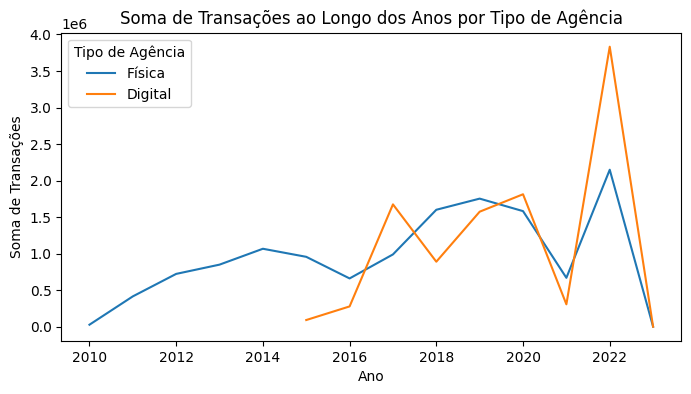

In [27]:
#soma das transações ao longo do tempo, por agência
df_contas = pd.read_csv('contas.csv')
df_transacoes = pd.read_csv('transacoes_atualizado.csv')
df_agencias = pd.read_csv('agencias.csv')

df_merged = pd.merge(df_transacoes, df_contas, on='num_conta', how='left')
df_merged = pd.merge(df_merged, df_agencias, on='cod_agencia', how='left')
df_merged['ano'] = pd.to_datetime(df_merged['data_transacao'], errors='coerce').dt.year

df_agrupado = df_merged.groupby(['ano', 'tipo_agencia'])['valor_transacao'].sum().reset_index()

plt.figure(figsize=(8, 4))

for tipo_agencia in df_agrupado['tipo_agencia'].unique():
    dados_tipo_agencia = df_agrupado[df_agrupado['tipo_agencia'] == tipo_agencia]
    plt.plot(dados_tipo_agencia['ano'], dados_tipo_agencia['valor_transacao'], label=tipo_agencia)

plt.legend(title='Tipo de Agência')
plt.xlabel('Ano')
plt.ylabel('Soma de Transações')
plt.title('Soma de Transações ao Longo dos Anos por Tipo de Agência')
plt.show()


Iremos investigar essa queda considerável em 2023, que vemos no gráfico.

In [28]:
df_transacoes = pd.read_csv('transacoes_atualizado.csv')
df_transacoes['data_transacao'] = pd.to_datetime(df_transacoes['data_transacao'])
df_2023 = df_transacoes[df_transacoes['data_transacao'].dt.year == 2023]

meses_com_transacoes = df_2023['data_transacao'].dt.month.unique()

print("Meses com transações em 2023:", meses_com_transacoes)


Meses com transações em 2023: [1]


Houve transação somente em um mês de 2023, por isso a queda no valor. 

In [29]:
import calendar


In [30]:

#filtro das transações para o ano de 2023 e print dos meses em que houveram transações
df_transacoes = pd.read_csv('transacoes_atualizado.csv')

df_transacoes['data_transacao'] = pd.to_datetime(df_transacoes['data_transacao'])

df_2023 = df_transacoes[df_transacoes['data_transacao'].dt.year == 2023]

meses_com_transacoes = df_2023['data_transacao'].dt.month.unique()

nomes_meses = [calendar.month_name[mes] for mes in meses_com_transacoes]

print("Meses com transações em 2023:", nomes_meses)


Meses com transações em 2023: ['January']


Como o último dado de transações, se refere a apenas o primeiro mês de 2023, não consideraremos este ano na análise.

In [31]:

#fusão de dataframes relacionados a transações bancárias, contas e agências, 
# cálculo do valor total de transações por tipo de agência
df_contas = pd.read_csv('contas.csv')
df_transacoes = pd.read_csv('transacoes_atualizado.csv')
df_agencias = pd.read_csv('agencias.csv')

df_merged = pd.merge(df_transacoes, df_contas, on='num_conta', how='left')
df_merged = pd.merge(df_merged, df_agencias, on='cod_agencia', how='left')

df_merged['ano'] = pd.to_datetime(df_merged['data_transacao'], errors='coerce').dt.year

df_total_transacoes = df_merged.groupby('tipo_agencia')['valor_transacao'].sum().reset_index()

print("DataFrame df_total_transacoes:")
print(df_total_transacoes)

for tipo_agencia in df_total_transacoes['tipo_agencia']:
    valor_total = df_total_transacoes[df_total_transacoes['tipo_agencia'] == tipo_agencia]['valor_transacao'].values[0]
    print(f"Valor Total de Transações nas Agências {tipo_agencia.capitalize()}: {valor_total}")


DataFrame df_total_transacoes:
  tipo_agencia  valor_transacao
0      Digital      11579143.34
1       Física      14126311.06
Valor Total de Transações nas Agências Digital: 11579143.34
Valor Total de Transações nas Agências Física: 14126311.06


In [32]:
propostas = pd.read_csv("propostas_credito.csv")
status_proposta = propostas['status_proposta'].unique()
print(status_proposta)




['Enviada' 'Aprovada' 'Em análise' 'Validação documentos']


In [33]:

#extrair e criar uma nova coluna chamada 'cidade/uf' a partir dos endereços presentes no dataframe de clientes
clientes = pd.read_csv("clientes.csv")

def extrair_cidade_uf(endereco):
    posicao_ultimo_numero = max((i for i, caractere in enumerate(endereco) if caractere.isdigit()), default=-1)
    
    if posicao_ultimo_numero == -1:
        return endereco
    
    cidade_uf = endereco[posicao_ultimo_numero + 1:].strip()
    return cidade_uf.replace('"', '')

clientes['cidade/uf'] = clientes['endereco'].apply(extrair_cidade_uf)

display(clientes[['cod_cliente', 'primeiro_nome', 'ultimo_nome', 'endereco', 'cidade/uf']].head(10))



,cod_cliente,primeiro_nome,ultimo_nome,endereco,cidade/uf
0,28,Sabrina,Dias,Praia de Duarte Vila Piratininga 81327-166 Fer...,Fernandes das Pedras / SP
1,674,Luiz Felipe,Dias,"Avenida da Rosa, 654 João Paulo Ii 20295449 Nu...",Nunes / AP
2,693,Renan,Dias,Jardim de Rodrigues Ipiranga 14161-477 Duarte ...,Duarte da Praia / RN
3,743,Clara,Dias,"Colônia Thomas Silva, 9 Tupi B 15771-946 Ferna...",Fernandes / SP
4,769,André,Dias,"Rua Correia, 889 Diamante 59123250 Aragão / RS",Aragão / RS
5,824,Heloísa,Dias,"Favela de da Mata, 3 Conjunto Novo Dom Bosco 7...",Vieira / MS
6,884,Maria Julia,Dias,"Esplanada Maria Luiza Ribeiro, 4 Conjunto Cali...",Moraes / ES
7,899,Arthur,Dias,"Ladeira Elisa da Rocha, 69 João Pinheiro 13964...",Araújo da Prata / PB
8,908,Vitor Gabriel,Dias,"Passarela Lucca Castro, 73 Vila Paris 99268696...",Farias / BA
9,945,Caio,Dias,"Fazenda Emanuel Gomes, 6 Cruzeiro 29428-910 No...",Novaes / SP


In [34]:
num_linhas = len(df)
print(f'O DataFrame "clientes" possui {num_linhas} linhas.')


O DataFrame "clientes" possui 71999 linhas.


In [35]:
clientes.to_csv('clientes_atualizado.csv', index = False)

In [36]:
clientes_atualizado = pd.read_csv('clientes_atualizado.csv')
display(clientes_atualizado.head())

,cod_cliente,primeiro_nome,ultimo_nome,email,tipo_cliente,data_inclusao,cpfcnpj,data_nascimento,endereco,cep,cidade/uf
0,28,Sabrina,Dias,moreiraemanuelly@example.org,PF,2017-04-03 16:11:00 UTC,357.081.496-39,2006-08-11,Praia de Duarte Vila Piratininga 81327-166 Fer...,95140-704,Fernandes das Pedras / SP
1,674,Luiz Felipe,Dias,pedroferreira@example.org,PF,2021-02-10 13:27:00 UTC,085.196.374-93,1995-10-11,"Avenida da Rosa, 654 João Paulo Ii 20295449 Nu...",76516-765,Nunes / AP
2,693,Renan,Dias,ogomes@example.net,PF,2020-01-21 13:12:00 UTC,783.416.059-10,1948-11-19,Jardim de Rodrigues Ipiranga 14161-477 Duarte ...,51779625,Duarte da Praia / RN
3,743,Clara,Dias,rafaelcorreia@example.org,PF,2019-05-06 11:39:00 UTC,589.237.610-95,1978-01-27,"Colônia Thomas Silva, 9 Tupi B 15771-946 Ferna...",19615792,Fernandes / SP
4,769,André,Dias,danilo33@example.org,PF,2017-01-07 14:53:00 UTC,459.608.721-02,1990-08-25,"Rua Correia, 889 Diamante 59123250 Aragão / RS",01672838,Aragão / RS


In [37]:
# Após o processo de junção, os valores das transações são agrupados por cidade/uf, 
# proporcionando uma visão da soma total das transações para cada localidade
transacoes = pd.read_csv('transacoes_atualizado.csv')
contas = pd.read_csv('contas.csv')
clientes = pd.read_csv('clientes_atualizado.csv')

merged_df = pd.merge(transacoes, contas, on='num_conta', how='left')

final_df = pd.merge(merged_df, clientes, on='cod_cliente', how='left')

final_df['num_conta'] = final_df['num_conta'].astype(str)

df_agrupado = final_df.groupby('cidade/uf')['valor_transacao'].sum().reset_index()

print(df_agrupado)


                   cidade/uf  valor_transacao
0               Almeida / ES         56551.49
1               Almeida / PA           241.98
2               Almeida / PB         84678.16
3               Almeida / RO         19292.72
4               Almeida / RS          9013.16
..                       ...              ...
936  das Neves do Campo / MS        108338.43
937  das Neves do Galho / DF          5112.55
938  das Neves do Galho / SP         14689.17
939  das Neves do Norte / DF         67382.17
940  das Neves do Oeste / SC           116.36

[941 rows x 2 columns]


In [40]:
valores_unicos = df_atualizado['nome_transacao'].unique()
print(valores_unicos)

['Saque' 'Pix Saque' 'Compra Débito' 'DOC - Recebido' 'Pix - Recebido'
 'TED - Recebido' 'Compra Crédito' 'DOC - Realizado' 'Pix - Realizado'
 'TED - Realizado' 'Estorno de Debito' 'Pagamento de boleto'
 'Depósito em espécie' 'Transferência entre CC - Débito'
 'Transferência entre CC - Crédito']


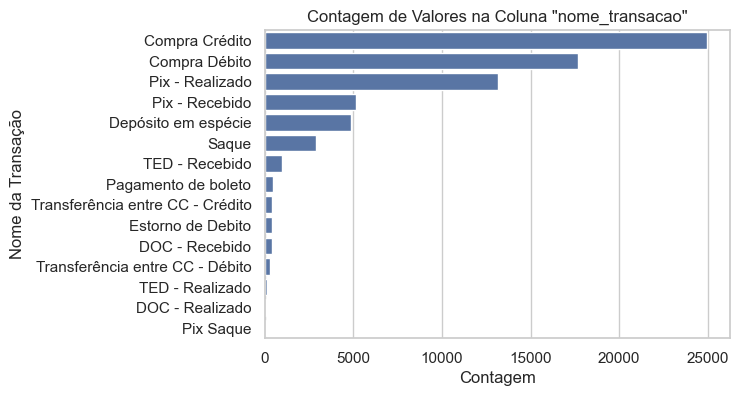

In [69]:
import seaborn as sns
contagem_valores = df_atualizado['nome_transacao'].value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(y='nome_transacao', data=df_atualizado, order=contagem_valores.index)

plt.xlabel('Contagem')
plt.ylabel('Nome da Transação')
plt.title('Contagem de Valores na Coluna "nome_transacao"')
plt.show()

In [44]:
contagem_valores = df_atualizado['nome_transacao'].value_counts()
print(contagem_valores)

nome_transacao
Compra Crédito                      24977
Compra Débito                       17662
Pix - Realizado                     13164
Pix - Recebido                       5134
Depósito em espécie                  4866
Saque                                2879
TED - Recebido                       1005
Pagamento de boleto                   452
Transferência entre CC - Crédito      441
Estorno de Debito                     403
DOC - Recebido                        402
Transferência entre CC - Débito       303
TED - Realizado                       130
DOC - Realizado                        91
Pix Saque                              90
Name: count, dtype: int64


In [45]:
nulos_na_coluna = df_atualizado['nome_transacao'].isnull().sum()
print(f"Número de valores nulos na coluna 'nome_transacao': {nulos_na_coluna}")

Número de valores nulos na coluna 'nome_transacao': 0


In [46]:
nulos_na_coluna = df_atualizado['data_transacao'].isnull().sum()
print(f"Número de valores nulos na coluna 'data_transacao': {nulos_na_coluna}")

Número de valores nulos na coluna 'data_transacao': 13902


In [47]:
porcentagem_nulos = (df_atualizado['data_transacao'].isnull().sum() / len(df_atualizado)) * 100
print(f"Porcentagem de valores nulos na coluna 'data_transacao': {porcentagem_nulos:.2f}%")

Porcentagem de valores nulos na coluna 'data_transacao': 19.31%


In [56]:
tipo_dados_data_transacao = df_atualizado['data_transacao'].dtype
print(f'Tipo dos valores na coluna "data_transacao": {tipo_dados_data_transacao}')


Tipo dos valores na coluna "data_transacao": object


In [57]:
df_atualizado['data_transacao'] = pd.to_datetime(df_atualizado['data_transacao'], errors='coerce')


In [60]:
nulos_na_coluna = df_atualizado['data_transacao'].isnull().sum()
print(f"Número de valores nulos na coluna 'data_transacao': {nulos_na_coluna}")

Número de valores nulos na coluna 'data_transacao': 0


In [59]:
df_atualizado['data_transacao'].fillna(pd.Timestamp('1970-01-01'), inplace=True)


C:\Users\santi\AppData\Local\Temp\ipykernel_5408\459113659.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1970-01-01 00:00:00' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  df_atualizado['data_transacao'].fillna(pd.Timestamp('1970-01-01'), inplace=True)


In [61]:

df_atualizado['data_transacao'] = pd.to_datetime(df_atualizado['data_transacao'], errors='coerce')
df_atualizado['data_transacao'].fillna(pd.Timestamp('1970-01-01'), inplace=True)

df_atualizado.to_csv('transacoes_atualizado_tratado.csv', index=False)


C:\Users\santi\AppData\Local\Temp\ipykernel_5408\3900772838.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1970-01-01 00:00:00' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  df_atualizado['data_transacao'].fillna(pd.Timestamp('1970-01-01'), inplace=True)


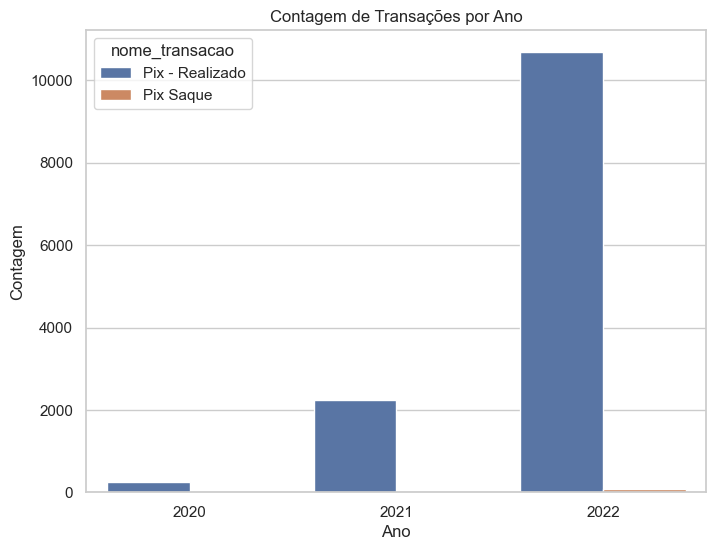

In [50]:


valores_selecionados = ['Pix Saque', 'Pix - Realizado', 'Pix Recebido']
df_selecionado = df_atualizado[df_atualizado['nome_transacao'].isin(valores_selecionados)]

# Ordenando o DataFrame pelos anos
df_selecionado = df_selecionado.sort_values(by='ano')

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='ano', hue='nome_transacao', data=df_selecionado)

plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.title('Contagem de Transações por Ano')

plt.show()


In [54]:
valores_transacao = ['Pix Saque', 'Pix - Realizado', 'Pix Recebido']

df_selecionado = df_atualizado[df_atualizado['nome_transacao'].isin(valores_transacao)]

contagem_por_ano = df_selecionado.groupby(['ano', 'nome_transacao']).size().reset_index(name='count')

print(contagem_por_ano)


    ano   nome_transacao  count
0  2020  Pix - Realizado    246
1  2020        Pix Saque      2
2  2021  Pix - Realizado   2235
3  2021        Pix Saque     17
4  2022  Pix - Realizado  10683
5  2022        Pix Saque     71


In [55]:


transacoes = pd.read_csv('transacoes_atualizado.csv')
contas = pd.read_csv('contas.csv')
clientes = pd.read_csv('clientes_atualizado.csv')

merged_df = pd.merge(transacoes, contas, on='num_conta', how='left')
final_df = pd.merge(merged_df, clientes, on='cod_cliente', how='left')

final_df['num_conta'] = final_df['num_conta'].astype(str)

df_agrupado = final_df.groupby('cidade/uf').size().reset_index(name='quantidade_registros')

print(df_agrupado)


                   cidade/uf  quantidade_registros
0               Almeida / ES                    77
1               Almeida / PA                    77
2               Almeida / PB                    66
3               Almeida / RO                    91
4               Almeida / RS                    82
..                       ...                   ...
936  das Neves do Campo / MS                    76
937  das Neves do Galho / DF                    64
938  das Neves do Galho / SP                    68
939  das Neves do Norte / DF                    68
940  das Neves do Oeste / SC                    88

[941 rows x 2 columns]


In [64]:
df_transacoes = pd.read_csv('transacoes_atualizado_tratado.csv')

valores_unicos_ano = sorted(df_transacoes['ano'].unique())

print(valores_unicos_ano)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


Com a preparação dos dados finalizada, seguirei com a análise no Power BI